# **Mounting the Drive in Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Define Paths for Training and Testing Datasets**

In [ ]:
# Define the paths to the training and testing datasets
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/skin-disease-datasaet/train_set'  # Replace with your actual path
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/skin-disease-datasaet/test_set'    # Replace with your actual path
img_size = 128

# **Load and Preprocess Data**

In [ ]:
import os
import cv2
import numpy as np

def load_data(data_dir, img_size):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Ensure classes are sorted
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (img_size, img_size))
                    images.append(img)
                    labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    images = np.array(images) / 255.0  # Normalize images
    labels = np.array(labels)
    return images, labels, class_names

# Load training and testing data
x_train, y_train, class_names = load_data(train_data_dir, img_size)
x_test, y_test, _ = load_data(test_data_dir, img_size)

print(f'Loaded {len(x_train)} training images with {len(class_names)} classes.')
print(f'Loaded {len(x_test)} testing images.')


Loaded 930 training images with 8 classes.
Loaded 234 testing images.


# **Split Training Data into Training and Validation Sets**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
print(f'Training set: {len(x_train)} images, Validation set: {len(x_val)} images')


Training set: 651 images, Validation set: 279 images


# **Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)
datagen.fit(x_train)


# **Build the CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

# **Train the Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50
21/21 [==============================] - 29s 1s/step - loss: 2.1023 - accuracy: 0.1367 - val_loss: 2.0674 - val_accuracy: 0.1434
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 26s 1s/step - loss: 2.0420 - accuracy: 0.1628 - val_loss: 1.9961 - val_accuracy: 0.2688
Epoch 3/50
21/21 [==============================] - 25s 1s/step - loss: 1.9990 - accuracy: 0.2197 - val_loss: 1.9201 - val_accuracy: 0.2903
Epoch 4/50
21/21 [==============================] - 23s 1s/step - loss: 1.9785 - accuracy: 0.2227 - val_loss: 1.8763 - val_accuracy: 0.3297
Epoch 5/50
21/21 [==============================] - 26s 1s/step - loss: 1.9000 - accuracy: 0.2688 - val_loss: 1.8258 - val_accuracy: 0.3226
Epoch 6/50
21/21 [==============================] - 27s 1s/step - loss: 1.8989 - accuracy: 0.2381 - val_loss: 1.8319 - val_accuracy: 0.3369
Epoch 7/50
21/21 [==============================] - 31s 1s/step - loss: 1.8917 - accuracy: 0.2611 - val_loss: 1.8828 - val_accuracy: 0.2832
Epoch 8/50
21/21 [==============================] - 24s 1s/step - loss: 1.8735 - accuracy: 0.2965 - val_loss: 1.6933 - val_accuracy: 0.3835
Epoch 9/50
21/21 [=============

# **Evaluate the Model**

8/8 - 3s - loss: 1.0312 - accuracy: 0.6282 - 3s/epoch - 425ms/step
Test accuracy: 0.6282
8/8 [==============================] - 4s 553ms/step
                            precision    recall  f1-score   support

            BA- cellulitis       0.71      0.65      0.68        34
               BA-impetigo       0.40      0.30      0.34        20
           FU-athlete-foot       0.62      0.94      0.75        32
            FU-nail-fungus       0.77      0.52      0.62        33
               FU-ringworm       0.50      0.35      0.41        23
PA-cutaneous-larva-migrans       0.50      0.40      0.44        25
             VI-chickenpox       0.70      0.91      0.79        34
               VI-shingles       0.61      0.70      0.65        33

                  accuracy                           0.63       234
                 macro avg       0.60      0.59      0.59       234
              weighted avg       0.62      0.63      0.61       234



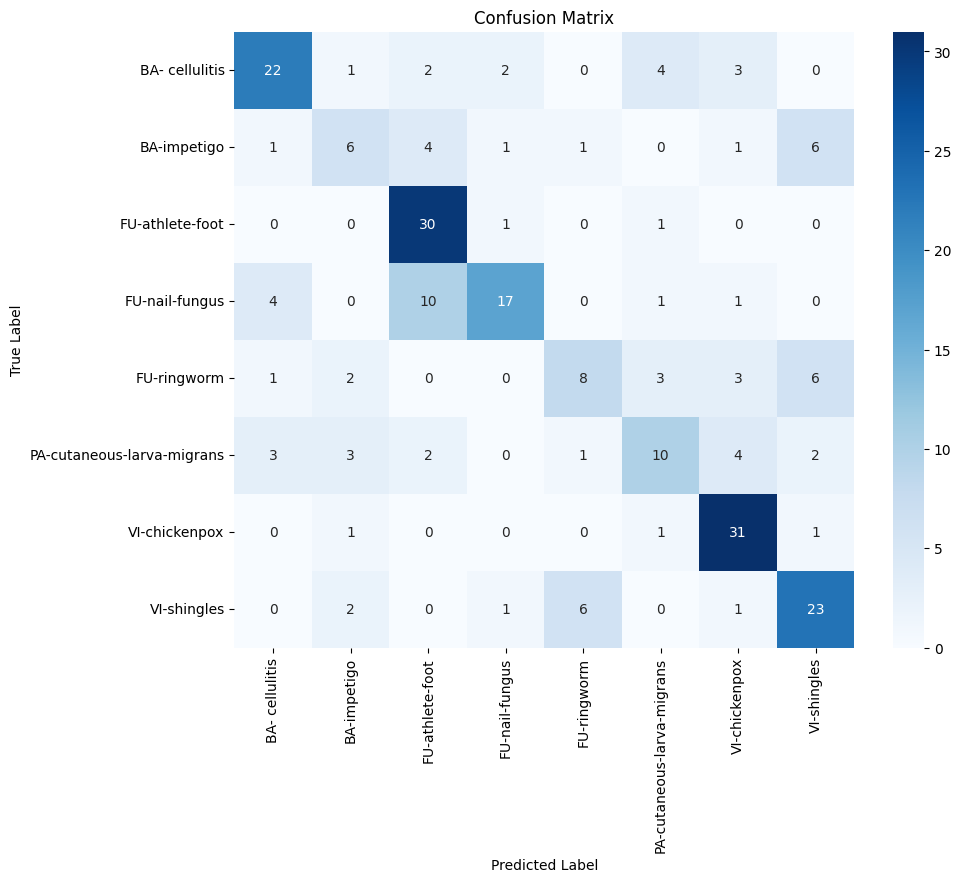

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best weights
model.load_weights('best_model.h5')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

# Predict on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Generate classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.title('Confusion Matrix')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Save the Model

In [ ]:
model.save('skin_disease_detection_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
